In [87]:
import pandas as pd

import numpy as np

import random as rd

import matplotlib.pyplot as plt

import scipy.stats as stats

from math import factorial

from scipy import stats as st 

import datetime as dt

# импорт библиотек

# Часть 1

## Обзор данных

In [88]:
hypotys = ( 
        pd.read_csv('hypothesis.csv')
    )

In [89]:
hypotys

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [90]:
hypotys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице 5 столбцов. Тип данных в столбцах различается. Присутствует — `int64`(4), `object`(1).

Согласно документации к данным:
* `Hypothesis` — краткое описание гипотезы
* `Reach` — охват пользователей по 10-балльной шкале
* `Impact` — влияние на пользователей по 10-балльной шкале
* `Confidence` —уверенность в гипотезе по 10-балльной шкале
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Количество значений в столбцах не различается. 


## Приоритизация гипотез

### Применение фреймворка ICE для приоритизации гипотез.

In [91]:
hypotys['ice'] = (hypotys['Impact'] * hypotys['Confidence'])/hypotys['Efforts']
hypotys.sort_values(by='ice', ascending= False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


In [92]:
hypotys['rice'] = (hypotys['Reach'] * hypotys['Impact'] * hypotys['Confidence'])/hypotys['Efforts']
# напишите ваш код здесь
hypotys.sort_values(by='rice', ascending= False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


**Вывод**

1) Гипотеза 7 поднялась с 3й позиции в фреймворке `ICE`  на 1ю в фреймворке `RICE`. Это связано с тем что в фреймворке `RICE` учитывается параметр `Reach`, котрый оценивает охват пользователей, данный параметр у гипотезы 7 имеет очень выысокую оценку

2) По той же причине, гипотеза 2 поднялась с 5й позиции в фреймворке `ICE`  на 2ю в фреймворке `RICE`

3) Обратная ситуаия с гипотизами 8 и 0, позиции которых понизились в связи с низкой оценкой параметра `Reach`.

4) Особено сильно подверглась изменению гипотеза 8 с оценкой данного параметра в единицу. Она опустилась с 1го места в  фреймворке `ICE`  на 5е в фреймворке `RICE`.

**Итог**

Параметр `RICE` оказывает довольно существенное влияние на результаты


# Часть 2. 

## Обзор данных

In [93]:
orders, visitors = ( 
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

In [94]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [95]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице `order` 5 столбцов. Тип данных в столбцах различается. Присутствует — `int64`(3), `object`(2).

Согласно документации к данным:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Количество значений в столбцах не различается. 

In [96]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [97]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице `visits` 3 столбца. Тип данных в столбцах различается. Присутствует — `int64`(1), `object`(2).

Согласно документации к данным:
* `date` — дата;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста;
* `group` — группа A/B-теста

Количество значений в столбцах не различается. 

## Предобработка данных

In [98]:
orders.duplicated().sum()

0

In [99]:
visitors.duplicated().sum()

0

## Анализ A/B-теста

### Построение графика кумулятивной выручки по группам. 

In [100]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


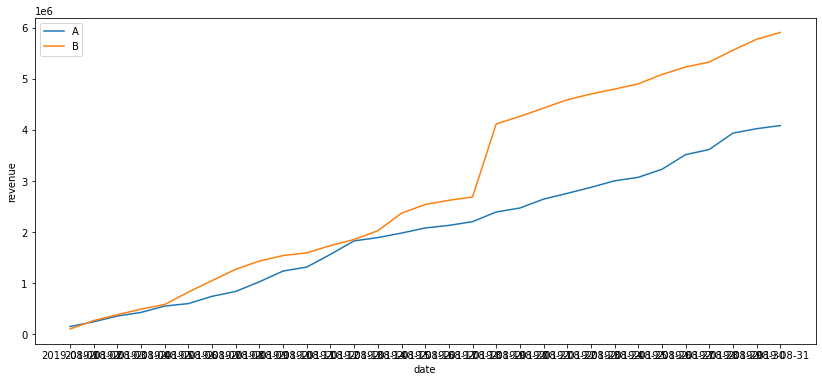

In [108]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(14,6))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.ylabel('revenue')
plt.xlabel('date')
plt.legend() 
plt.show()

       

**Вывод**

* Выручка почти равномерно увеличивается до середины графика, 
* Однако в группе B в середине происходит резкий скачок. 
*  Это может быть связано с всплесками числа заказов, либо с появлением очень дорогих заказов в выборке. 

### Построение графика кумулятивного среднего чека по группам.

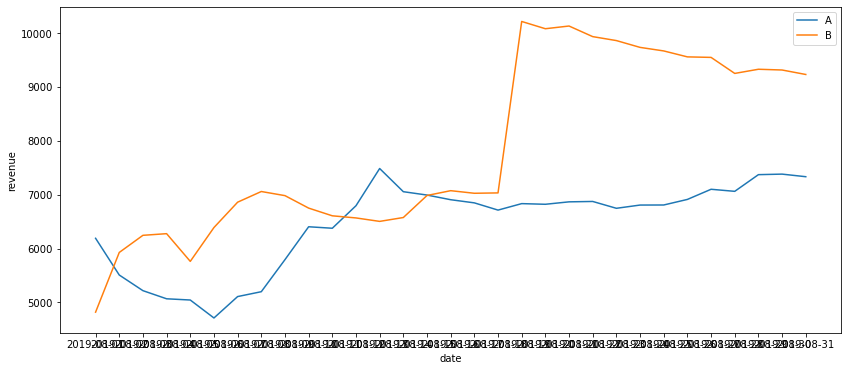

In [107]:
plt.figure(figsize=(14,6))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.ylabel('revenue')
plt.xlabel('date')
plt.legend() 
plt.show()


**Вывод**

* Средний чек в группе A постепенно стабилизируется возле отметки в 7000 
* Однако в группе B в середине граика также наблюдается резкий скачок. Значит  в середине теста в группу B попали очень крупные заказы 
*  В связи с этим средний чек группы B сейчас падает и до сих пор не стаббилизировался

### Построение графика  относительного изменения кумулятивного среднего чека группы B к группе A.

No handles with labels found to put in legend.


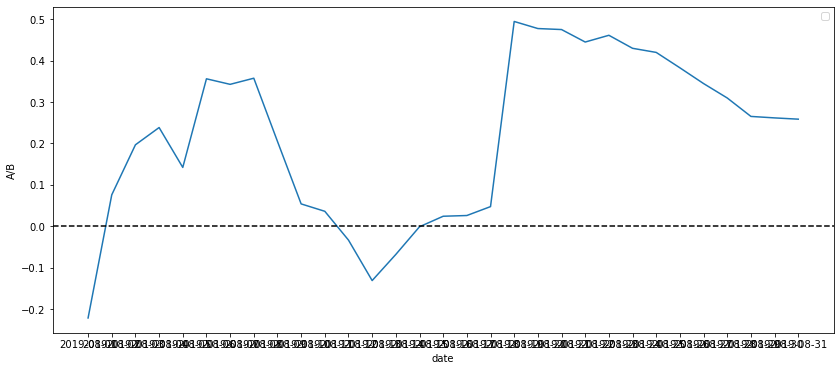

In [106]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(14,6))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1 )
plt.figsize=(15, 30)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('A/B')
plt.xlabel('date')
plt.legend() 
plt.show()



**Вывод**

* В нескольких точках график различия между сегментами резко «скачет»
* Это связано с аномльными заказами, которые следует исключить для более точных выводов 

### Построение графика  кумулятивной конверсии по группам.

(0.0, 30.0, 0.0, 0.05)

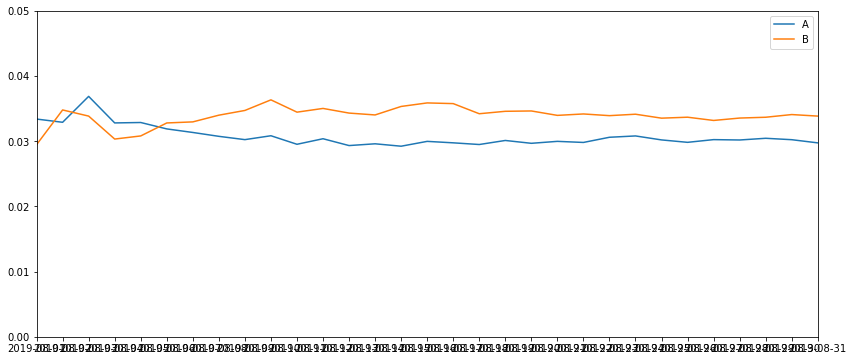

In [109]:
date_max = cumulative_data['date'].max()  # момент анализа(2019, 11, 1).date()
date_min = cumulative_data['date'].min() 
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(14,6))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis([date_min, date_max, 0, 0.05])

**Вывод**

* Конверсия обеих групп зафиксировалась 

* Конверсия группы B  практически с самого начала теста держалась стабильно выше конверсия группы A

### Построение графика  относительного изменения кумулятивной конверсии группы B к группе A.

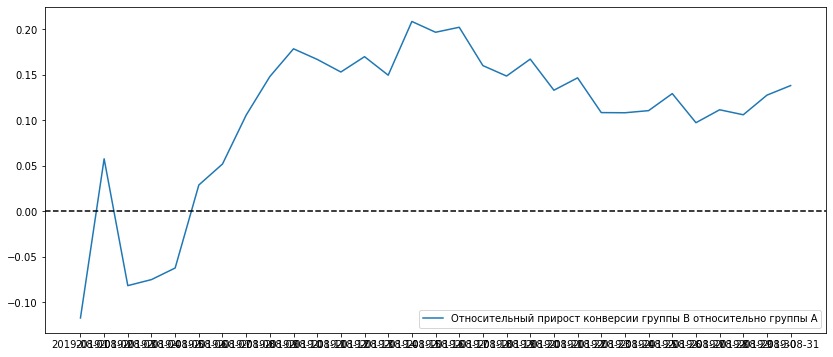

In [110]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,6))

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод**

* В начале теста группа B значительно проигрывала группе A
* Однако группа В вырвалась впере лидирует по конверсии на протяжении всего теста
* Пирост конверсии группы В относительно группы А колеблется от 10% до 20% 

### Построение точечной диаграммы числа заказов на одного пользователя. Подсчет 95го и 99го перцентиля для определения аномального количества заказов.

 95й и 99 перцентили равны [2. 4.]


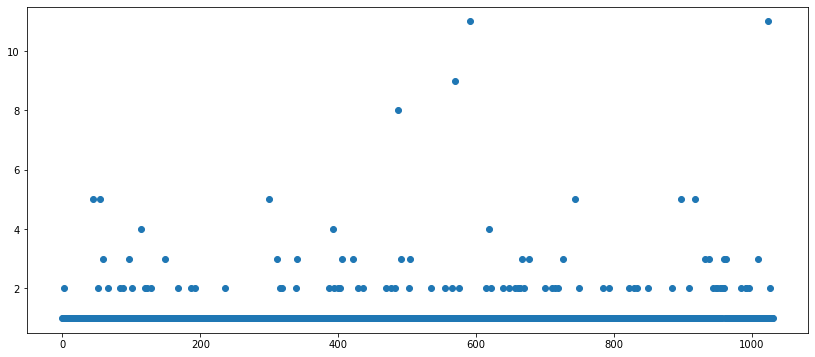

In [111]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']

print(f' 95й и 99 перцентили равны {np.percentile(orders_by_users["orders"], [ 95, 99])}') 

plt.figure(figsize=(14,6))

x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']) 
plt.show()

**Вывод**

* Судя по графику, есть пользователи, которые делали аномально много заказов. Значения доходя вплоть до 8-11 заказов

* 95й и 99й перцентили равны 2м и 4м соответственно.То есть 95% пользователей заказывали 2 и менее раз

* Принято отсеивать от 1% до 5% наблюдений с крайними значениями, поэтому следует считать аномальными все пользователей с количеством заказов выше 2х

###  Построение точечной диаграммы стоимости заказов. Подсчет 95го и 99го перцентиля для определения аномальных заказов.

 95й и 99 перцентили равны [32899.5 67750. ]


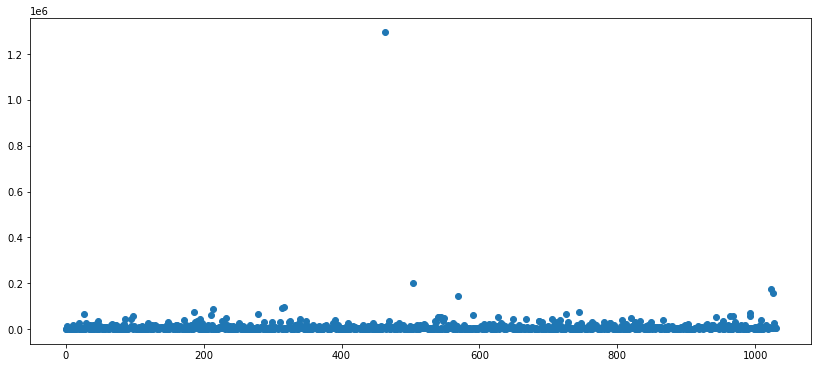

In [112]:
revenue_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'revenue': 'sum'})
)
revenue_by_users.columns = ['user_id', 'revenue']

print(f' 95й и 99 перцентили равны {np.percentile(revenue_by_users["revenue"], [95, 99])}') 

plt.figure(figsize=(14,6))

x_values = pd.Series(range(0,len(revenue_by_users)))
plt.scatter(x_values, revenue_by_users['revenue']) 
plt.show()

**Вывод**

* Судя по графику, есть небольшое количество пользователей, которые делали очень дорогие заказы. 

* 95й и 99й перцентили равны 32.8тыс и 67.7тыс соответственно.То есть стоимость заказов 95% пользователей дешевле 33тыс

* Принято отсеивать от 1% до 5% наблюдений с крайними значениями, поэтому следует считать аномальными всех пользователей, сделавших заказ свыше 33тыс рублей

### Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. 

#### Подготовка данных

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#### Подсчет 

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


**Гипотеза**

- нулевая гипотеза: конверсия в группах  по «сырым» данным равна

- альтернативная гипотеза: конверсия в группах  по «сырым» данным не равна

`alpha` = 0.05

- При проверке гипотезы будет использован  непараметрический тест Уилкоксона-Манна-Уитни так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты

In [41]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод**

* По «сырым» данным различия в конверсии групп A и B есть

* `p-value = 0.0168` меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем.


### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

**Гипотеза**

- нулевая гипотеза: средний чек в группах  по «сырым» данным равен

- альтернативная гипотеза: средний чек в группах по «сырым» данным не ревен

`alpha` = 0.05

- При проверке гипотезы будет использован  непараметрический тест Уилкоксона-Манна-Уитни так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты

In [42]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод**

* По «сырым» данным различий в среднем чеке групп A и B нет

* `p-value = 0.7` значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.


### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным.

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 33000]['transactionId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



**Гипотеза**

- нулевая гипотеза: конверсия  в группах по «очищенным» данным равна

- альтернативная гипотеза: конверсия в группах по «очищенным» данным не равна

`alpha` = 0.05

- При проверке гипотезы будет использован  непараметрический тест Уилкоксона-Манна-Уитни 

In [44]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


p-значение:  0.011549354609175194
Отвергаем нулевую гипотезу: разница статистически значима
0.170


**Вывод**

* По «очищенным» данным различия в конверсии групп A и B есть

* `p-value = 0.011` меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем.

* Относительный прирост конверсии группы B равен 17%.


### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

**Гипотеза**

- нулевая гипотеза: средний чек в группах по «очищенным» данным равен

- альтернативная гипотеза: средний чек в группах по «очищенным» данным не равен

`alpha` = 0.05

- При проверке гипотезы будет использован  непараметрический тест Уилкоксона-Манна-Уитни

In [45]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-значение:  0.6605988588102022
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.234


**Вывод**

* По «очищенным» данным различий в среднем чеке групп A и B нет

* `p-value = 0.66`, это немного ниже, чем при сырых данных, однако все равно значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.

* Относительный прирост среднего чека группы B равен 20%.


 ### Итоги по результатам теста

**По тетсту можно сказать следующее**

* Статистически значимое различие по конверсии между группами есть и по «сырым», и по данным после фильтрации аномалий;

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к ухудшению

* График различия среднего чека говорит о том, что результаты группы B значительно лучше

**Вывод**

Тест можно остонавливать, группа `B` - подбедитель
